# MSDS 7333 – Unit 4 Case Study
Albert Asuncion, Brian Lee, Ethan Graham, Melina Shulyak

## Abstract
Time series analysis enables predictive and retrodictive insights into phenomena that can be measured across intervals of time. We use frontier signal analysis to decide the future contract rolling strategy for an investor on the Powershares QQQ exchange traded fund.

## Introduction

#### History and Origin of Futures.
Futures trading evolved out of the need for buyers and sellers of goods to mitigate price volatility. By aggreeing on a future selling price, both buyer and seller are protected from uncertainty of market conditions until the goods and commodities are ready for delivery, mitigating the counterparty risks inherent between parties to a transaction. When a producer of grain expects his crops to grow to maturity at a future time, his foremost concern is a price he can plan for and come harvest the assurance of a buyer for his crops. This one-to-one arrangement between buyer and seller, called forward contracts, were effective only if both both parties fufill their end of the deal. Moreover, there was a need to efficiently match buyer and seller efficiently. Thus in 1948, as the Great Lakes became linked to the Mississippi River via railroad and the Illinois-Michigan canal, the Chicago Board of Trade (CBOT) was formed [1].

The CBOT provided a mechanism to stabilize prices and regulate trade through the establishment of a grain exchange. It devised and facilitated the trading of futures contracts: “legally binding agreements to buy and sell a standardized asset on a specific date”. Futures contracts are indispensable instruments behind all trade which have the following key features [2]:

- Standardized contract  - Making contract specifications identical across participants allows for trading these instruments easily transferable. As a result, the only variable is price, everything else such as the quality, quantity, physical delivery time and location are stipulated but standardized for all participants.
- Exchange-traded - By establishing an exchange, counterpart risks were eliminated and parties were assured that the exchange guranteed the transactions and assumed all the risks. Buyers and sellers transact anonymously on a platform where they are brought together to operate with ease in a highly liquid and optimized market.

#### Workings of a Trade.
In a futures contract, the "forward price" is predeterimed for a time in the future, hence the coloquial term "futures" to refer to the trading of these derivative products. In other words, buyer and seller agree on a future price based on both speculating that upon time of settlement, i.e. delivery date, the instrument will yield a profit. 
The market's "invisible hand" establishes the optimum price that provides sellers a hedge against price risk and speculators, seeking to make a profit trading the contracts. Upon expiration of a contract, a futures trader has 3 options [2]:
<ol>
<li>
Settlement - The most obvious course of action is for the trader who is selling (short position) to deliver the asset and/or for the buyer (long position) to pay cash.
</li>
<li>
Rollover - In rollover, the trader opts to offset an expiring current position for a new position in the next contract month.
</li>
<li>
Offset the Position - The trader takes and equal and opposite transaction to neutralize the trade.
</li>
</ol>

# Literature Review
#### The Purpose of Time Series.
<p>
Time series analysis is the evaluation of any structured form of data with a certain measure of time. With financial data the objective is to create the ability to make an inference by applying some form of algorithm to determine the potential outcome of an investment over a finite period. The options for the analysis method can vary by case. For example, for a series of data where volatility is not immediately apparent, time series analysis can provide some additional insight. Often as a result of different modeling strategies and practices to either reduce error, determine correlations, risk, and various other methods depending on the use case and the domain knowledge required to assess. A list of broad categories of analysis examples include, but are not limited to [6]:
</p>

- Regression models
- Long-Memory models
- Nonlinear models and tests
- Continuous-time models
- Multivariate time series analysis

#### Time Series, Futures, and PowerShares QQQ ETF.
<p>
For the purpose of this case study we observe specifically from PowerShares QQQ Trust ETF.
Originally established from the Nasdaq-100 Index, PowerShares QQQ ETF Trust have high profile technology companies such as Intel, Facebook, Microsoft, Apple, etc. amongst the companies with major holdings within the portfolio.
As a result, there is inherent currency risk due to foreign currency exchange rates with QQQ.
However, QQQ is an excellent option for investors who have interest in holding technology companies stock without having to invest all within a single tech company [7].
</p>
<p>
Futures rolling contracts, can be a viable option to mitigate risk. To mitigate that risk, a strategy will incorporate multiple contracts, depending on the overall roll yield, also accounting for the roll cost of futures.
Selection of multiple different ETFs to manage the resulting costs and mitigate for what is termed, “contango,” the state at which longer-dated contracts more expensive than shorter term contracts[8].
However, in this case study PowerShares QQQ ETF Trust will be evaluated to determine if the ETL will return a positive yield to determine if investment will result in a positive yield.
</p>

In [2]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))
%matplotlib inline
pd.options.display.max_rows = 10

# Background

#### What's an ETF?
ETFs or Exchange-trade funds have been around since 1993 but they started being used significantly in 2003.
We can think of an ETF as a form of an index fund as it shares the same goals, providing investors with a benchmark return with minimal cost. Unlike Index funds, which are very costly to trade, ETFs often trade commission-free.

#### What's QQQ?
For this analysis, we decided to the use the powershares QQQ widely held and traded exchange-traded fund that tracks the Nasdaq 100 Index, which is composed of 100 of the largest international and domestic companies, excluding financial companies, that are listed on the Nasdaq stock exchange, based on market capitalization. This means that QQQ is weighted towards large-cap technology companies giving us a great picture or snapshot of how the technology sector is trading.

QQQ is rebalanced quarterly and reconstituded annually, tracking the information technology, health care, consumer discretionary, consumer staples, industrial and communication services sectors.


As of Feb. 14, 2018, the sector breakdown of QQQ was [3]: 

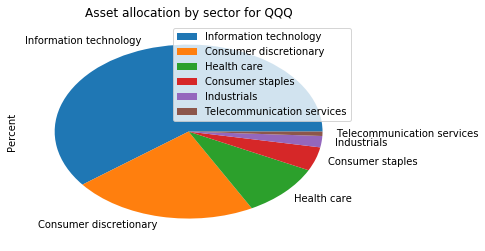

In [3]:
idx = ["Information technology", "Consumer discretionary", "Health care",
       "Consumer staples","Industrials", "Telecommunication services"]
d = np.array([60.44, 22.38, 9.85, 4.42, 2.1, 0.81]) / 100.0
pie = pd.DataFrame(data=d, index=idx, columns=["Percent"])
pie.plot(title="Asset allocation by sector for QQQ", kind="pie", y="Percent"); pass

The top 10 holdings of QQQ, as of Feb. 14, 2018, were:

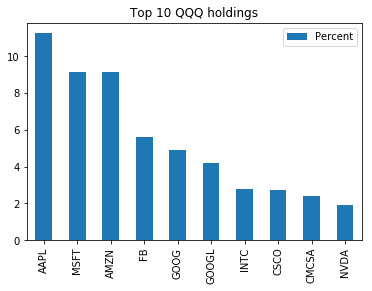

In [4]:
idx = ["AAPL","MSFT","AMZN","FB","GOOG","GOOGL","INTC","CSCO","CMCSA","NVDA"]
d = np.array([11.25,9.17,9.15,5.6,4.89,4.19,2.78,2.72,2.41,1.92])       
pd.DataFrame(data=d, index=idx, columns=["Percent"]).plot(kind = "bar", title="Top 10 QQQ holdings"); pass

With 11.25% of QQQ's holdings, Apple (AAPL) has a market cap of $900 billion, one of largest market cap in history.
Apple is one of the most important companies to the returns for QQQ investors.

## Future Contract Rolling application
#### Preparation for Analysis.
<p>
Using the Pandas, Numpy, datetime, and Pyplot modules, analysis will be performed by the leveraging the cabilities of the APIs to pull PowerShares QQQ ETF data from May 1, 2017 to May 1, 2018.
</p>
<p>
We will use scaled prices for the QQQ exchange-traded fund as a proxy for the S&P 500 index:
</p>

In [5]:
import pandas_datareader.data as web
# Approximate price of S&P 500 index. Load 1 year of QQQ closing price data starting May, 2017
px = web.DataReader('QQQ','iex','2017-05-01','2018-05-01')['close'] * 10
px

2y


date
2017-05-01    1360.219
2017-05-02    1362.500
2017-05-03    1358.137
2017-05-04    1358.633
2017-05-05    1363.590
                ...   
2018-04-25    1586.500
2018-04-26    1619.900
2018-04-27    1620.900
2018-04-30    1609.400
2018-05-01    1627.800
Name: close, Length: 253, dtype: float64

## Data Description
Using the `pandas_datareader` API, data was fetched from The Investors Exchange (IEX). The IEX returns historical data for up to 5 years prior, and includes daily opening price, high and low price for the day, closing price, and volume. This analysis is only concerned with closing prices.
Our Future contract analysis uses the QQQ closing price data from May, 1<sup>st</sup> 2017, and an end date of May 1<sup>st</sup>, 2018.
The results were loaded into a Python Pandas new dataframe `px`.
The plot below shows the closing price over time, a generally upward trend.

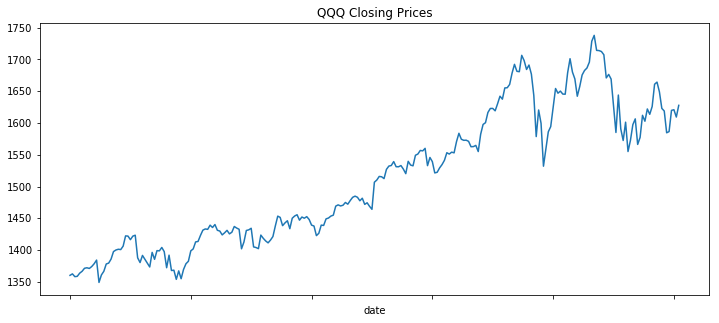

In [5]:
px.plot(title="QQQ Closing Prices", figsize=(12,5))
pass

# Methods

__Setting Expiry Dates.__ To simulate a futures position of QQQ shares, we setup 2 contracts with expirations set for September 21, 2018 to December 21, 2018.

In [6]:
from datetime import datetime
expiry = Series({'QQQ_C1': datetime(2018, 9, 21), 'QQQ_C2': datetime(2018, 12, 21)}).sort_values()
expiry

QQQ_C1   2018-09-21
QQQ_C2   2018-12-21
dtype: datetime64[ns]

__Simulated Future Closing Price.__ There are generally two approaches in securities trading which traders utilize to predict the markets - fundamental and technical analysis. Fundamentals are based on economic and financial indicators while technicals are based on data patterns and trends. These approaches are outside the scope of this paper. For our purposes, we used McKinney's random and walk and noise generator [?] to simulate predicted prices for 200 periods after the end of our actual closing prices, i.e. May 1<sup>st</sup>, 2018.

In [8]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'QQQ_C1': near, 'QQQ_C2': far}, index=rng)
prices.tail()

,QQQ_C1,QQQ_C2
2019-01-17,1657.05,1658.80
2019-01-18,1643.30,1645.55
2019-01-21,1651.30,1653.05
2019-01-22,1667.80,1667.05
2019-01-23,1647.80,1645.55


__Rollover Return.__ In order to model the process of evaluating the state of a position, McKinney devised a weighting matrix with a linear deacy such that contracts start with a weight of 1, then approaches 0 the closer we get to expiration. The rollover return is then calculated as the percentage change in daily closing price mutiplied by the weight.

$$RolloverReturn = PctChangeInPrice * Weight$$

where `PctChangeInPrice` is the incremental change in the daily average closing price;
and `Weight` is a value that starts from 1 and *decaying* to 0 as the contract approaches expiration.

When the cumulative sum of the `RolloverReturn` over the life of a contract is greater than or equal to 0, we liquidate the *near* contract position to realize the gain. Conversely, a negative would indicate a losing position and a decision to rollover to the *far* contract.

Below is McKinney's weighting matrix function.

In [9]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [10]:
weights = get_roll_weights('6/1/2018', expiry, prices.columns)

/Users/albertasuncion_mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


To illustrate how the rollover return is calculated, we take the weights for each contract the last 10 days leading up to the QQQ_C1 expiry date of 9/21/2018. Since QQQ_C1 expires on 9/21/2018, the weight decays from a value of 1 to a value of 0 at expiration. QQQ_C2 doesn't expire until 12/21/2018 and therefore carries a weight of 1.

In [11]:
weights.loc['2018-09-10':'2018-9-21']

,QQQ_C1,QQQ_C2
2018-09-10,1.0,0.0
2018-09-11,1.0,0.0
2018-09-12,1.0,0.0
2018-09-13,1.0,0.0
2018-09-14,0.8,0.2
2018-09-17,0.6,0.4
2018-09-18,0.4,0.6
2018-09-19,0.2,0.8
2018-09-20,0.0,1.0
2018-09-21,0.0,1.0


In [12]:
prices.pct_change().loc['2018-09-10':'2018-9-21']

,QQQ_C1,QQQ_C2
2018-09-10,0.003088,0.004029
2018-09-11,0.000000,0.000535
2018-09-12,-0.009100,-0.008958
2018-09-13,-0.007293,-0.009309
2018-09-14,-0.007347,-0.005311
2018-09-17,-0.004797,-0.005613
2018-09-18,-0.013359,-0.013630
2018-09-19,0.013400,0.013540
2018-09-20,0.013361,0.014323
2018-09-21,0.003262,0.001765


In [13]:
rolled_returns = (prices.pct_change() * weights).sum(1)
rolled_returns.loc['2018-09-10':'2018-09-21']

2018-09-10    0.003088
2018-09-11    0.000000
2018-09-12   -0.009100
2018-09-13   -0.007293
2018-09-14   -0.006940
2018-09-17   -0.005123
2018-09-18   -0.013522
2018-09-19    0.013512
2018-09-20    0.014323
2018-09-21    0.001765
Freq: B, dtype: float64

## Results

Observing the "QQQ Weighted Percent Change with Future Estimate" plot below displays actual percent change values from the June 1, 2018 to September 21, 2018 contract. Rolled returns of the future contract with consideration to weighted values is plotted with the blue line with the contract term being from September 10, 2018 to December 21, 2018. We observe that it is difficult to establish whether rolling the contract would be right decision based on the output.

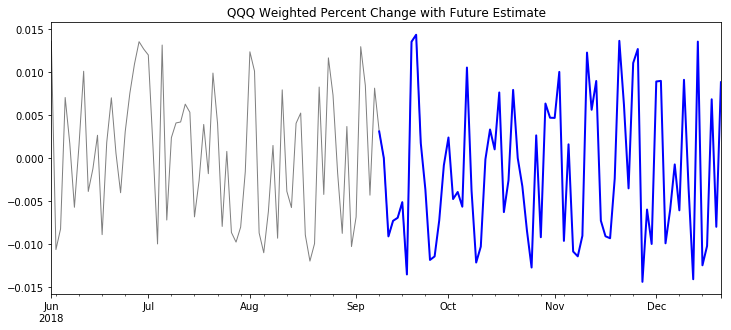

In [14]:
rolled_returns['2018-06-1':'2018-9-21'].plot(color='grey', linewidth=1, figsize=(12,5), title="QQQ Weighted Percent Change with Future Estimate")
rolled_returns['2018-09-10':'2018-12-21'].plot(color='blue', linewidth=2)

With our model in place, we were able to review the return on the near contract position, QQQ_C1, and compare it to the predicted return for the far position, QQQ_C2. The return for QQQ_C1, expiring September 21, 2018, yielded 3.4%. 

In [14]:
rolled_returns.loc['2018-06-1':'2018-9-21'].sum()

0.0341983406061801

The predicted return for QQQ_C2 from September 21, 2018 to December 21, 2018, indicates a loss of -11.23%.

In [15]:
rolled_returns.loc['2018-09-10':'2018-12-21'].sum()

-0.11226466169990001

## Future Work/Discussion/Conclusion

#### Other Ways to calculate weights
<p>Some other aproaches that we found while doing our research about rolling future contracts and possible mechanisms to identify or generate weights in python was the "Rolling on Volume or present interest" which with the perpetual method, identify the roll date as the first day where volume of the far contract exceeds volume of the near contract, adjust the prices of the previous sessions ( last 3 or 4 sessions) to rill date by weithing the near and far contracts in increments and decrements of X% amount [4]. It looks like a very interested concept that we will like to try in future projects.</p>
<p>Futures analysis is an open ended problem, and there are many other ways to look at this data. We could consider using exponensial decay for the weights, instead of linear. That would increase the effect of prices ending close to the contract expiry date.</p>
<p>We could add gaussian volatility modeling into the weight distribution by looking at the frequency of closing prices along a rolling time window. This would tell us the standard deviation, skewness, and kurtosis of the distribution of closing prices. The kurtosis would inform us whether the ETF was in a high or low volatility period [5].</p>

#### Future Work
<p>A caveat to consider, in the event that there is further evaluation of an upcoming event that could potentially cause a rise in the yield that is not accounted for in the analysis such as mergers, acquisitions, or other event that impact the future outcome of the stock value, there is further analysis that would be required to determine the level of risk associated. However, when only considering the analysis that was performed with this case study, the recommendation is this contract should not be rolled to the next contract term as we have predicted that it will result in a net loss to yield.</p>

#### Conclusion
<p>In conclusion, the percent change for the June 1, 2018 to September 21, 2018 contract gives us a positive yield of 3.42 percent whereas the predicted outcome of the September 10, 2018 to December 21, 2018 contract leaves us with a -11.226 percent loss. In total, if we were to roll this contract over to the next term, we would observe a net loss of -7.807 percent. Therefore, it is under advisement based on our analysis, that this contract not be rolled to the next term.</p>

### Bibliography
<ol>
<li>C. Garner, A trader’s first book on commodities: an introduction to the world’s fastest growing market. Upper Saddle River, N.J: FT Press, 2010.</li>
<li>https://institute.cmegroup.com/courses/introduction-to-futures-html</li>
<li>https://en.wikipedia.org/wiki/Futures_contract</li>
<li>https://www.investopedia.com/ask/answers/061715/what-qqq-etf.asp</li>
<li>https://www.premiumdata.net/support/futurescontinuous.php</li>
<li>https://www.investopedia.com/articles/financial-theory/10/gaussian-models-statistics.asp</li>
<li>https://books.google.com/books?id=ddL4tTLb_08C&printsec=frontcover#v=onepage&q&f=false</li>
<li>https://www.investopedia.com/articles/markets/011516/qqq-powershares-qqq-trust-etf.asp</li>
<li>http://www.etf.com/publications/etfr/options-futures-etfs-oh-my?nopaging=1</li>
<li>W. McKinney, Python for data analysis. Beijing: O’Reilly, 2013.</li>
</ol>